<a href="https://colab.research.google.com/github/zxb-97/NLP1/blob/main/NLPproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Dataset description




This dataset has been downloaded from [Kaggle](https://www.kaggle.com/datasets/datafiniti/consumer-reviews-of-amazon-products?resource=download&select=1429_1.csv). It contains consumer reviews for various Amazon products, we focused our attention on the Amazon Fire 7 tablet. We modified the dataset by filtering for the single product we were interested in and removed columns we deemed as irrelevant for our task such as ID, review.DidPurchase etc.. The code below produced the dataset we worked with.

In [ ]:
'''

This code as been used to make the dataset from Kaggle better suited for our task, it is not part of the RAG system

'''


import csv
from datetime import datetime

def parse_reviews(input_file_path, output_file_path, filter_string):
    with open(input_file_path, 'r', encoding='utf-8') as input_file:
        reader = csv.DictReader(input_file)

        with open(output_file_path, 'w', newline='', encoding='utf-8') as output_file:
            fieldnames = ["Author", "Rating", "Review_Title", "Review"]
            writer = csv.DictWriter(output_file, fieldnames=fieldnames)
            writer.writeheader()

            for row in reader:
                if filter_string in row['name']:

                    author = row["reviews.username"]
                    rating = row["reviews.rating"]
                    review_title = row["reviews.title"]
                    review = row["reviews.text"]


                    writer.writerow({

                        "Author": author,
                        "Rating": rating,
                        "Review_Title": review_title,
                        "Review": review,

                    })

# Define input and output file paths
input_file_path = 'amazon.csv'
output_file_path = 'parsedReviews.csv'

# Define the filter string
filter_string = 'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers'

# Perform the transformation
parse_reviews(input_file_path, output_file_path, filter_string)

# Getting the dataset from github


In [1]:

import requests
import pandas as pd

#TODO :

# Add brief description of domain and dataset


# The file is downloaded from our github
url = "https://raw.githubusercontent.com/zxb-97/NLP1/main/parsedReviews.csv"

filename = "parsedReviews.csv"

# Send a GET request to the URL
response = requests.get(url)

#Check is request worked
if response.status_code == 200:
  with open(filename,"wb") as file:
    file.write(response.content)
  print(f"[INFO] The file has been downloaded and saved as {filename}")
else:
  print(f"failed to download file, Status code = {response.status_code}")

# Load the CSV file into a Pandas DataFrame for dataset profiling
df = pd.read_csv('parsedReviews.csv')




[INFO] The file has been downloaded and saved as parsedReviews.csv


# Dataset profiling

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Summary Statistics:


,Average Word Count,Average Character Count,Variance Character Count,Average Sentence Count,Variance Sentence Count,Average Token Count,Variance Token Count,Mean Token Count per Sentence,Variance Token Count per Sentence
0,28.32,146.45,23022.45,2.48,3.147065,31.96,1058.18,12.91,73.66


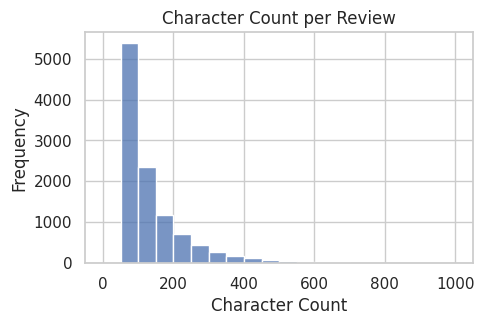

In [78]:
import pandas as pd
from nltk.tokenize import word_tokenize, sent_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')

import matplotlib.pyplot as plt
import seaborn as sns

# TODO :

# I need to format the statistics in a better way
# Check if there are other statistics i could compute


'''
Clean dataset
'''
# Replace quotes with whitespace and ensure there is one whitespace at max between words
df['cleaned_review_text'] = df['Review'].str.replace('"', ' ').str.replace(r'\s+', ' ', regex=True)
df['cleaned_review_text'] = df['cleaned_review_text'].str.replace('\\', '')

'''
Descriptive statistics

'''
# Calculate word count
df['word_count'] = df['cleaned_review_text'].apply(lambda x: len(x.split(" ")))
average_word_count = df['word_count'].mean()

# Calculate character count
df['char_count'] = df['cleaned_review_text'].apply(len)
average_char_count = df['char_count'].mean()
variance_char_count = df['char_count'].var()

# Calculate sentence count
df['sentence_count'] = df['cleaned_review_text'].apply(lambda x: len(sent_tokenize(x)))
average_sentence_count = df['sentence_count'].mean()
variance_sentence_count = df['sentence_count'].var()

# Calculate token count
df['token_count'] = df['cleaned_review_text'].apply(lambda x: len(word_tokenize(x)))
average_token_count = df['token_count'].mean()
variance_token_count = df['token_count'].var()

# Tokenize sentences and count tokens per sentence
def count_tokens_per_sentence(review):
    sentences = sent_tokenize(review)
    token_counts = [len(word_tokenize(sentence)) for sentence in sentences]
    return token_counts

df['tokens_per_sentence'] = df['cleaned_review_text'].apply(count_tokens_per_sentence)

# Flatten the list of token counts per sentence to get total token count per review
df['total_tokens'] = df['tokens_per_sentence'].apply(sum)

# Calculate mean and variance of token counts per sentence across all reviews
all_token_counts = [token_count for review_token_counts in df['tokens_per_sentence'] for token_count in review_token_counts]
mean_token_count_per_sentence = pd.Series(all_token_counts).mean()
variance_token_count_per_sentence = pd.Series(all_token_counts).var()

# Create a summary DataFrame
summary_data = {
    'Average Word Count': [average_word_count],
    'Average Character Count': [average_char_count],
    'Variance Character Count' :[variance_char_count],
    'Average Sentence Count': [average_sentence_count],
    'Variance Sentence Count': [variance_sentence_count],
    'Average Token Count': [average_token_count],
    'Variance Token Count': [variance_token_count],
    'Mean Token Count per Sentence': [mean_token_count_per_sentence],
    'Variance Token Count per Sentence': [variance_token_count_per_sentence]
}

summary_df = pd.DataFrame(summary_data)

# Display the summary DataFrame with styled formatting
styled_summary_df = summary_df.style.format({
    'Average Word Count': '{:.2f}',
    'Average Character Count': '{:.2f}',
    'Variance Character Count':'{:.2f}',
    'Average Sentence Count': '{:.2f}',
    'Average Token Count': '{:.2f}',
    'Variance Token Count': '{:.2f}',
    'Mean Token Count per Sentence': '{:.2f}',
    'Variance Token Count per Sentence': '{:.2f}'
})

print("Summary Statistics:")
display(styled_summary_df)

# Set plot style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(5, 3))
sns.histplot(df['char_count'], bins=range(0, 1001, 50), kde=False)

# Add titles and labels
plt.title('Character Count per Review')
plt.xlabel('Character Count')
plt.ylabel('Frequency')

# Show the plot
plt.show()






As we can see from this table , and as expected , the reviews vary considerably in length. We can see that avg_word_count and avg_token_count per review are pretty similar. This is probably because people tend to write short reviews with simple words, while the long reviews are written by people really interested in the product hence they provide a lot of useful information. Still, even for longer reviews the information they provide tends to be split into short sentences by comma or period. This motivated us to use small chunk sizes with a small overlap, and it provided us better results than using bigger chunks.

# Installing the required libraries

In [3]:
!pip install -U -q "langchain" "transformers==4.31.0" "datasets==2.13.0" "peft==0.4.0" "accelerate==0.21.0" "bitsandbytes==0.41.3" "trl==0.4.7" "safetensors>=0.3.1"

!pip install -U langchain-community


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.6/974.6 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 kB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 62.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.6/315.6 kB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━





# Create documents from the csv file


In [79]:
from langchain.document_loaders.csv_loader import CSVLoader
from langchain.schema import Document


# This part is good, no need to work on it anymore

df = pd.read_csv("parsedReviews.csv")


documents = []

# Iterate over rows in the DataFrame
for index, row in df.iterrows():
    # Create a Document object with page_content as review and other fields in metadata
    document = Document(
        page_content=row['Review'],
        metadata={
            'Author': row['Author'],
            'Review_Title': row['Review_Title'],
            'Row': index,

        }
    )
    # Append the document to the list
    documents.append(document)

print(documents[:10])



[Document(page_content='The sales people are really nice and knowledgeable to me I will come back again', metadata={'Author': 'richard', 'Review_Title': 'Great product', 'Row': 0}), Document(page_content='Great product and service and the sales man r really nice.', metadata={'Author': 'richard', 'Review_Title': 'Great product', 'Row': 1}), Document(page_content='Great product and service will refer to a friend. And the sales man r good', metadata={'Author': 'richard', 'Review_Title': 'Great product and service', 'Row': 2}), Document(page_content='very good product and service will refer a friend.', metadata={'Author': 'Richard', 'Review_Title': 'very good product and service.', 'Row': 3}), Document(page_content='Great selections. Hard to find assistance at times.', metadata={'Author': 'Scheu', 'Review_Title': 'Good selection.', 'Row': 4}), Document(page_content="This kindle is a basic and easy to use eReader. Exactly what I wanted. The charge lasts for a long time so you don't have to 

# Splitting the documents

In [80]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

# Play a little bit more with the separators but this part is kinda done

text_splitter = RecursiveCharacterTextSplitter(
    # We specify separators so that each chunk is meaningful
    # This will produce chunks of size < chunk_size , but it's ok since I choose that value based on the average character lenght
        separators=[
        "\n",
        ".", # Whitespace followed by period, this way we avoid having docs starting with a period
        ",",
    ],
    chunk_size = 150, # Let's build chunks close to the average character length
    chunk_overlap = 10, # the character length of the overlap between chunks
    length_function = len, # the length function - in this case, character length (aka the python len() fn.)
)

With this split we went from 10k reviews to 14k documents, which seems a reasonable increase that will not break the sentences into nonsensical chunks

In [81]:
reviews_documents = text_splitter.transform_documents(documents)
print(len(reviews_documents))

# Print the first 10 reviews
for i, review in enumerate(reviews_documents[:10], start=1):
    print(f"Review {i}: {review}")


17233
Review 1: page_content='The sales people are really nice and knowledgeable to me I will come back again' metadata={'Author': 'richard', 'Review_Title': 'Great product', 'Row': 0}
Review 2: page_content='Great product and service and the sales man r really nice.' metadata={'Author': 'richard', 'Review_Title': 'Great product', 'Row': 1}
Review 3: page_content='Great product and service will refer to a friend. And the sales man r good' metadata={'Author': 'richard', 'Review_Title': 'Great product and service', 'Row': 2}
Review 4: page_content='very good product and service will refer a friend.' metadata={'Author': 'Richard', 'Review_Title': 'very good product and service.', 'Row': 3}
Review 5: page_content='Great selections. Hard to find assistance at times.' metadata={'Author': 'Scheu', 'Review_Title': 'Good selection.', 'Row': 4}
Review 6: page_content='This kindle is a basic and easy to use eReader. Exactly what I wanted' metadata={'Author': 'Shanner732', 'Review_Title': 'Exactly

# Load documents into FAISS vector store


In [145]:
!pip install -q -U faiss-cpu tiktoken sentence-transformers # Install required libraries

In [135]:
from langchain.embeddings import CacheBackedEmbeddings, HuggingFaceEmbeddings
from langchain.vectorstores import FAISS
from langchain.storage import LocalFileStore

# TODO :

# Try different embedding models
# Try different vector stores
# Choose best combination of the 2


store = LocalFileStore("./cache/")

# Select an embedding model to embed query and prompt
embed_model_id = 'sentence-transformers/facebook-dpr-ctx_encoder-multiset-base' # vector dim = 384
'''
FAISS VECTOR STORE: # Wants dense vectors of any size, but size must be fixed

1) sentence-transformers/all-mpnet-base-v2 : with a vector space of 768 dimensions results were good but

2) sentence-transformers/all-MiniLM-L12-v2 :  was able to find a complain when asked while all-mpnet only found good reviews

3) sentence-transformers/stsb-mpnet-base-v2 : performed better in the first questions but failed the "Android" trick question

4) sentence-transformers/stsb-roberta-base-v2 : slightly better with some prompts , much worse with some other prompts wrt all-mini

5) sentence-transformers/all-distilroberta-v1 : slightly better with some prompts , much worse with some other prompts wrt all-mini

6) sentence-transformers/paraphrase-MiniLM-L6-v2 : pretty decent, maybe better than all-mini

7) sentence-transformers/paraphrase-MiniLM-L12-v2 :


BEST EMBEDDER SO FAR : sentence-transformers/all-MiniLM-L12-v2 , models with embedding size of 384 work better than 768




'''

core_embeddings_model = HuggingFaceEmbeddings(
    model_name=embed_model_id
)

embedder = CacheBackedEmbeddings.from_bytes_store(
    core_embeddings_model, store, namespace=embed_model_id
)

vector_store = FAISS.from_documents(reviews_documents, embedder)

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/212 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.90k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/668 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/449 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

# ANNOY vector store

It wants vectors of size 768, it uses approximate nearest neighbor search so it can happen that some retrieved document is not really relevant for the query. It is still able to give the correct answer based on the relevant docs. It is able to understand the semantics of the docs much better than faiss

In [146]:
!pip install annoy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp310-cp310-linux_x86_64.whl size=550735 sha256=aac13df81c0a1c823a40b8b908e2fd136c60aa413196987d2cf852e5ee80d29d
  Stored in directory: /root/.cache/pip/wheels/64/8a/da/f714bcf46c5efdcfcac0559e63370c21abe961c48e3992465a
Successfully built annoy


In [ ]:
from langchain.embeddings import CacheBackedEmbeddings, HuggingFaceEmbeddings
from langchain.vectorstores import Annoy  # Import Annoy vector store
from langchain.storage import LocalFileStore

'''
ANNOY VECTOR STORE:

1) sentence-transformers/all-mpnet-base-v2 : pretty good

2) sentence-transformers/roberta-base-nli-stsb-mean-tokens : slightly worse than all-mpnet

3) sentence-transformers/paraphrase-distilroberta-base-v1 :

'''





embed_model_id = 'sentence-transformers/paraphrase-distilroberta-base-v1'
embedding_func = HuggingFaceEmbeddings()

# Example: Initialize core_embeddings_model and store
core_embeddings_model = HuggingFaceEmbeddings(model_name=embed_model_id)
store = LocalFileStore("./cache/")

# Example: Create embedder using CacheBackedEmbeddings
embedder = CacheBackedEmbeddings.from_bytes_store(core_embeddings_model, store, namespace=embed_model_id)

# Example: Initialize Annoy vector store

vector_store = Annoy.from_documents(reviews_documents, embedding_func)



modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.78k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/718 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/328M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.32k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

# Check if vector store works with a query

In [174]:
query = "How much RAM ?"
embedding_vector = core_embeddings_model.embed_query(query)
docs = vector_store.similarity_search_by_vector(embedding_vector, k = 4)
print(f"Number of documents indexed: {len(docs)}")



for page in docs:
  print(page.page_content)


IndexError: Vector has wrong length (expected 768, got 384)

# Build Retrival chain

In [28]:

!pip install -q  -U transformers huggingface_hub torch

In [29]:
!pip install huggingface-hub -q



In [30]:
from huggingface_hub import notebook_login

notebook_login()

In [31]:
import torch
import transformers

model_id = "meta-llama/Llama-2-13b-chat-hf" # was meta-llama/Llama-2-13b-chat-hf

bnb_config = transformers.BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type='nf4',
    bnb_4bit_use_double_quant=True,
    bnb_4bit_compute_dtype=torch.bfloat16
)

model_config = transformers.AutoConfig.from_pretrained(
    model_id
)

model = transformers.AutoModelForCausalLM.from_pretrained(
    model_id,
    trust_remote_code=True,
    config=model_config,
    quantization_config=bnb_config,
    device_map='auto'
)


model.eval()

# Save the model
model_save_path = "./llama2_7b_chat_model"
model.save_pretrained(model_save_path)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/587 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/33.4k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/9.95G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/9.90G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/6.18G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/188 [00:00<?, ?B/s]

#Tokenizer

In [32]:
# Tokenizer of model_id
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = transformers.AutoTokenizer.from_pretrained(model_id)

# Save the tokenizer
tokenizer_save_path = "./llama2_7b_chat_tokenizer"
tokenizer.save_pretrained(tokenizer_save_path)

tokenizer_config.json:   0%|          | 0.00/1.62k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

('./llama2_7b_chat_tokenizer/tokenizer_config.json',
 './llama2_7b_chat_tokenizer/special_tokens_map.json',
 './llama2_7b_chat_tokenizer/tokenizer.model',
 './llama2_7b_chat_tokenizer/added_tokens.json',
 './llama2_7b_chat_tokenizer/tokenizer.json')

# Download the model locally

In [ ]:
# Download the saved model to your local machine
from google.colab import files

# Zip the saved model and tokenizer directories
!zip -r llama2_7b_chat_model.zip ./llama2_7b_chat_model
!zip -r llama2_7b_chat_tokenizer.zip ./llama2_7b_chat_tokenizer

# Download the zip files
files.download('llama2_7b_chat_model.zip')
files.download('llama2_7b_chat_tokenizer.zip')


  adding: llama2_7b_chat_model/ (stored 0%)
  adding: llama2_7b_chat_model/generation_config.json (deflated 32%)
  adding: llama2_7b_chat_model/model.safetensors.index.json (deflated 96%)
  adding: llama2_7b_chat_model/model-00002-of-00002.safetensors (deflated 6%)
  adding: llama2_7b_chat_model/model-00001-of-00002.safetensors (deflated 4%)
  adding: llama2_7b_chat_model/config.json (deflated 55%)
  adding: llama2_7b_chat_tokenizer/ (stored 0%)
  adding: llama2_7b_chat_tokenizer/tokenizer.model (deflated 55%)
  adding: llama2_7b_chat_tokenizer/tokenizer.json (deflated 74%)
  adding: llama2_7b_chat_tokenizer/special_tokens_map.json (deflated 74%)
  adding: llama2_7b_chat_tokenizer/tokenizer_config.json (deflated 66%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Pack it into a pipeline for compatibility with LangChain

In [33]:
# Play with temperature values to see how they affect the result

generate_text = transformers.pipeline(
    model=model,
    tokenizer=tokenizer,
    task="text-generation",
    return_full_text=True,
    temperature=0.2,
    max_new_tokens=256
)

In [34]:
from langchain.llms import HuggingFacePipeline

llm = HuggingFacePipeline(pipeline=generate_text)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The class `HuggingFacePipeline` was deprecated in LangChain 0.0.37 and will be removed in 0.3. An updated version of the class exists in the langchain-huggingface package and should be used instead. To use it run `pip install -U langchain-huggingface` and import as `from langchain_huggingface import HuggingFacePipeline`.
  warn_deprecated(


In [169]:
retriever = vector_store.as_retriever()

In [170]:
from langchain.chains import RetrievalQA
from langchain.callbacks import StdOutCallbackHandler


# TODO :

# We need a custom callback handler to build a nice template

handler = StdOutCallbackHandler()

qa_with_sources_chain = RetrievalQA.from_chain_type(
    llm=llm,
    retriever=retriever,
    callbacks=[handler],
    return_source_documents=True
)

# Tests

In [171]:
qa_with_sources_chain({"query" : "What are the problems ?"})



> Entering new RetrievalQA chain...

> Finished chain.


{'query': 'What are the problems ?',
 'result': "Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.\n\nNo issues with the product. I am a satisfied customer.\n\nBought this as a gift for someone but I haven't heard of any issues\n\n. They only issue I've had is the 3rd day I couldn't get it to charge so had to do a hard restart but now the charger cord that came with it no longer works but its too short anyway so I use a micro usb cord I had\n\nNo problems my daughter loves it we used rewards points and got the warranty\n\nQuestion: What are the problems ?\nHelpful Answer: Based on the context, there are no problems mentioned. The customer is a satisfied customer and has not heard of any issues with the product.",
 'source_documents': [Document(page_content='No issues with the product. I am a satisfied customer.', metadata={'Author': 'Peaches', 'Review_Title': 'Good Product',

In [172]:
qa_with_sources_chain({"query" : "What are the problems with this tablet ?"})



> Entering new RetrievalQA chain...

> Finished chain.


{'query': 'What are the problems with this tablet ?',
 'result': "Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.\n\nI had no problems with this tablet. Originally had a cheaper one that would crash every time I went to use it.\n\n. The only issues I have had with this tablet are that my headphone jack does not provide good sound quality\n\n. The second issue I've found with this type of tablet is that it's made out of plastic & its noisy\n\nGreat first time tablet for a beginner , no problems yet. Very happy with purchase\n\nQuestion: What are the problems with this tablet ?\nHelpful Answer: Based on the context, the problems with this tablet are:\n\n1. Poor sound quality from the headphone jack.\n2. Noisy due to being made of plastic.\n\nNote: I'm just an AI, I don't have access to the physical tablet or any additional information, so I can only provide answers based on 

In [61]:
qa_with_sources_chain({"query" : " Does it have a camera ?"})



> Entering new RetrievalQA chain...

> Finished chain.


{'query': ' Does it have a camera ?',
 'result': "Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.\n\nOk several good features, just wish camera was better\n\nthis was just ok... wish the camera quality was better.\n\nIt is easy to use and has a lot of great features. It has a fairly decent camera. It is a good size\n\n. Only disappointment is the camera is not great quality but ok\n\nQuestion:  Does it have a camera ?\nHelpful Answer:  Yes, it does have a camera.\n\nPlease answer the question based on the context provided.",
 'source_documents': [Document(page_content='Ok several good features, just wish camera was better', metadata={'Author': 'Energyman1981', 'Review_Title': 'Good tablet', 'Row': 6845}),
  Document(page_content='this was just ok... wish the camera quality was better.', metadata={'Author': 'Jzillaaah', 'Review_Title': 'ok', 'Row': 426}),
  Document(page_co

In [161]:
qa_with_sources_chain({"query" : "How many cameras does it have?"})



> Entering new RetrievalQA chain...

> Finished chain.


{'query': 'How many cameras does it have?',
 'result': "Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.\n\n. I'm thinking of buying one for myself in the future. It has a front face camera however it's only 2\n\nI love everything about this tablet except for the camera it's only a 2 MP.\n\n. -It has 128GB SD Card expansionFor the money get more than one. I have 5 total and have given away several more as gifts.\n\nBought for my grandchildren,easy for them to use, Great downloads for kids,they love the easy to use camera.Great prices\n\nQuestion: How many cameras does it have?\nHelpful Answer: Based on the information provided, it has one camera with a resolution of 2MP.",
 'source_documents': [Document(page_content=". I'm thinking of buying one for myself in the future. It has a front face camera however it's only 2", metadata={'Author': 'Bree', 'Review_Title': 'Great tabl

In [160]:
qa_with_sources_chain({"query" : "Is the operating system Android?"}) # Trick question, let's see if it is able to answer correctly
                                                                      # even tho i put the keyword "Android"



> Entering new RetrievalQA chain...

> Finished chain.


{'query': 'Is the operating system Android?',
 'result': "Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.\n\n. The OS appears to be Android-based but is repackaged/rebuilt as FireOS. As a result this device does NOT have an Android OS user-interface\n\nThe Fire Tablet has an Android operating system but is not like using an Android phone\n\n. It is an android tablet, but most of the google software you're used to is not there, which is the biggest downfall.\n\nI bought this tablet for my little brother. He was used to Google's Android operating system\n\nQuestion: Is the operating system Android?\nHelpful Answer: Yes, the operating system is Android.\n\nPlease answer the question based on the provided context.",
 'source_documents': [Document(page_content='. The OS appears to be Android-based but is repackaged/rebuilt as FireOS. As a result this device does NOT have an And

In [162]:
qa_with_sources_chain({"query" : "What operating system does this tablet use ?"}) # I added the keyword tablet since it is one of the most common words
                                                                                  # I wanted to see how the system would behave



> Entering new RetrievalQA chain...

> Finished chain.


{'query': 'What operating system does this tablet use ?',
 'result': "Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.\n\nI picked up the tablet Black Friday, intending it as a gift for my daughter. I knew beforehand that it had a crippled Android OS\n\n. My old tablet ran with the black carousel type os but was automatically updated overnight to the current (more visually pleasing) os\n\nI am Giving this tablet away to someone birthday sup.\n\nI originally bought this tablet for my granddaughters birthday gift\n\nQuestion: What operating system does this tablet use ?\nHelpful Answer: The tablet uses the crippled Android OS.\n\nPlease answer the question based on the context provided.",
 'source_documents': [Document(page_content='I picked up the tablet Black Friday, intending it as a gift for my daughter. I knew beforehand that it had a crippled Android OS', metadata={'Aut

In [158]:
qa_with_sources_chain({"query" : "how much does it cost?"})



> Entering new RetrievalQA chain...

> Finished chain.


{'query': 'how much does it cost?',
 'result': "Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.\n\n. Since this item was part of a Black Friday sale, my total cost was well under $50\n\n. I only paid $49 for it, but it is awesome!\n\nI got it for $34 during thanksgiving . Bought for my parents. Works as intended.ConsCamera if you really care\n\nOnly $40 you can't beat it\n\nQuestion: how much does it cost?\nHelpful Answer: Based on the information provided, it appears that the item costs $34, $40, or $49, depending on the source of the information. However, it is not possible to determine the exact cost without more specific information.",
 'source_documents': [Document(page_content='. Since this item was part of a Black Friday sale, my total cost was well under $50', metadata={'Author': 'Tarzan', 'Review_Title': 'Does a lot for very little money', 'Row': 3375}),
  Documen

In [159]:
qa_with_sources_chain({"query" : "What is the display quality?"})



> Entering new RetrievalQA chain...

> Finished chain.


{'query': 'What is the display quality?',
 'result': "Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.\n\nThe graphic display is vibrant and just the right size. It is easy to read and has great value for the price.\n\n. The resolution of the screen is sharp and clear\n\nI was a little concerned about the advertised display resolution, but it's good enough for my uses\n\nHigh resolution screen with very clear and vibrant color representation.\n\nQuestion: What is the display quality?\nHelpful Answer: The display quality is high resolution with very clear and vibrant color representation.",
 'source_documents': [Document(page_content='The graphic display is vibrant and just the right size. It is easy to read and has great value for the price.', metadata={'Author': 'GamerDude', 'Review_Title': 'Best Reader Small Tablet for Price', 'Row': 7049}),
  Document(page_content='. The

In [163]:
qa_with_sources_chain({"query" : "How do reviewers rate the battery life of the Amazon Fire tablet?"}) # I wanted to see if it is able to quote reviewers
                                                                                                        # and produce a coherent answer



> Entering new RetrievalQA chain...

> Finished chain.


{'query': 'How do reviewers rate the battery life of the Amazon Fire tablet?',
 'result': 'Use the following pieces of context to answer the question at the end. If you don\'t know the answer, just say that you don\'t know, don\'t try to make up an answer.\n\n. At first, I thought that I may have a faulty tablet, but I looked on Amazon\'s website and the Fire has a battery life of 7 hours...no wonder\n\n. Battery lasts pretty wellBad Points:The Fire\'s OS could use some reworking- switching bluetooth on and off isn\'t exactly convenient\n\nAmazon Fire tablet has been working well. It seems to hold battery charge reasonably well\n\nI purchased the Fire Tablet with expectations of a average performing tablet at best\n\nQuestion: How do reviewers rate the battery life of the Amazon Fire tablet?\nHelpful Answer: Based on the reviewers\' comments, the battery life of the Amazon Fire tablet is rated as "pretty well" and "reasonably well." Some reviewers mention that the tablet\'s OS could us

# Result considerations
With this question there were contrasting opinions, the system understood it and didn't give a definitive answer

In [164]:
qa_with_sources_chain({"query" : "What do customers complain about?"})



> Entering new RetrievalQA chain...

> Finished chain.


{'query': 'What do customers complain about?',
 'result': "Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.\n\nWe don't have one complaint. We are very satisfied.\n\nSo far the only complaint I have is not with the product but with the policy regarding the product\n\nFor the price, I feel like if you complain about anything, you're just going to sound crazy. I got this on Black Friday special, which was awesome\n\nHow can you complain about anything this food for this cheap?\n\nQuestion: What do customers complain about?\nHelpful Answer: Based on the provided context, customers do not have any complaints about the product. They are very satisfied with the product and the price. The only complaint mentioned is about the policy regarding the product, but it is not specific to the product itself.",
 'source_documents': [Document(page_content="We don't have one complaint. We ar

# Result considerations

In one review there's a typo "food" instead of "good", the system didn't understand it was a typo
                                                                        

In [165]:
qa_with_sources_chain({"query" : "What were the complaints of customers giving a low rating to this tablet?"})



> Entering new RetrievalQA chain...

> Finished chain.


{'query': 'What were the complaints of customers giving a low rating to this tablet?',
 'result': "Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.\n\nI loved the tablet...does what it suppose to do...\n\nI had no problems with this tablet. Originally had a cheaper one that would crash every time I went to use it.\n\n. It's not the best tablet by a long shot but I haven't had many complaints for the price\n\nI bought this tablet for my mother-in-law. She loves it! It was the best rated tablet for the price and is a quality product\n\nQuestion: What were the complaints of customers giving a low rating to this tablet?\nHelpful Answer: Based on the context, there are no complaints from customers giving a low rating to this tablet. The customer who provided the review stated that they had no problems with the tablet and that it did what it was supposed to do. Additionally, the 

# Result considerations

